In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [1]:
__name__

'__main__'

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_cols = df.dtypes[df.dtypes=='object'].index

for c in categorical_cols:
    df[c]=df[c].str.lower().str.replace(' ', '_')

In [5]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [6]:
df.churn = (df.churn == 'yes').astype(int)

In [7]:
df_full_train , df_test  = train_test_split(df, test_size=.2, random_state=1)

In [8]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_trst = df_test.reset_index(drop=True)

In [10]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [11]:
del(df_train['churn'])
del(df_val['churn'])
del(df_test['churn'])

# Exploratory data analysis

In [12]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [13]:
df_test.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [14]:
global_churn_rate = df_full_train.churn.value_counts(normalize=True).values[1]     # = df_full_train.churn.mean()

In [15]:
df_full_train.dtypes
# we care about 3 numerical features: tenure, monthlycharges, totalcharges

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [16]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [17]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [18]:
df_full_train[categorical].nunique()
 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [19]:
churn_male = df_full_train[df_full_train.gender=='male'].churn.mean()

In [20]:
churn_female = df_full_train[df_full_train.gender=='female'].churn.mean()
churn_female

0.27682403433476394

In [21]:
global_churn_rate

0.26996805111821087

In [22]:
global_churn_rate - churn_female

-0.006855983216553063

In [23]:
global_churn_rate - churn_male


0.006754520462819769

In [24]:
churn_partenenr = df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_no_partenenr = df_full_train[df_full_train.partner=='no'].churn.mean()
churn_partenenr, churn_no_partenenr

(0.20503330866025166, 0.3298090040927694)

In [25]:
global_churn_rate - churn_partenenr,global_churn_rate - churn_no_partenenr

(0.06493474245795922, -0.05984095297455855)

## <dl> ways to know feature imporance of **Categorical variables** </dl>
### <dt>Difference between Global_churn_rate and feature_churn_rate</dt>
   <dd><li> if diff > 0 this feature is less likely to be churn </li></dd>
   <dd><li>if diff < 0 this feature is more likely to be churn </li></dd>
   
### <dt>Risk rate </dt>
   <dd><li>easier for comprehension from Difference. calculate feature_churn_rate / Global_churn_rate
      if this ratio is bigger than 1 then this is an imprtant feature and the people with this particular feature is more likely to churn </li>  </dd>

###  <dt>Mutual Information</dt>
   <dd><li> indicates whether a user will churn if know another feature . Generally it tells us how much we can learn about a variable if we know the value of another one. In other words it measure relative importance of categorical variables  </dd></li>

In [26]:
churn_partenenr/global_churn_rate , churn_no_partenenr/global_churn_rate 

(0.7594724924338315, 1.2216593879412643)

In [27]:
df_full_train.groupby('gender').churn.mean() #this returns pandas series
df_full_train.groupby('gender').churn.agg(['mean', 'count']) #this returns pandas datafame

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [28]:
from IPython.display import display

In [29]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count']) 
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group) 

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [30]:
from sklearn.metrics import mutual_info_score
for c in categorical:
    print(f'Mutual info between churn and {c} is ',end=' ')
    print(mutual_info_score(df_full_train.churn, df_full_train[c]))

Mutual info between churn and gender is  0.0001174846211139946
Mutual info between churn and seniorcitizen is  0.009410216144208144
Mutual info between churn and partner is  0.009967689095399745
Mutual info between churn and dependents is  0.012345815445534689
Mutual info between churn and phoneservice is  0.00022871269738296285
Mutual info between churn and multiplelines is  0.0008574478744731856
Mutual info between churn and internetservice is  0.055867945893496467
Mutual info between churn and onlinesecurity is  0.06308524972985574
Mutual info between churn and onlinebackup is  0.0469234640537918
Mutual info between churn and deviceprotection is  0.04345286925268559
Mutual info between churn and techsupport is  0.06103245991777444
Mutual info between churn and streamingtv is  0.03185333110086085
Mutual info between churn and streamingmovies is  0.03158089669519908
Mutual info between churn and contract is  0.0983203874041556
Mutual info between churn and paperlessbilling is  0.01758

In [31]:
#another way
mi = df_full_train[categorical].apply(lambda x: mutual_info_score(df_full_train.churn, x))
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Now let's talk about **numerical variables** and their relation to churn (target variable):
<dd><li> <b>we will do this by using pearson correlation</b></li></dd>

In [32]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

#### This numbers tells us that:
<dd><li> <b>tenure</b> feature has negative correlation with churn variable, i.e. churn decreases when tenure increases</dd></li>
<dd><li> <b>monthlycharges</b> feature has positive correlation with churn variable, i.e. churn increases when monthlycharges increases</dd></li>
<dd><li> <b>totalcharges</b> feature has negative correlation with churn variable, i.e. churn decreases when totalcharges increases</dd></li>

In [33]:
df_full_train[df_full_train.tenure <= 2].churn.mean(),\
df_full_train[(df_full_train.tenure > 2) & df_full_train.tenure <= 12].churn.mean(),\
df_full_train[df_full_train.tenure > 12].churn.mean()

(0.5953420669577875, 0.26996805111821087, 0.17634908339788277)

In [34]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean(),\
df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges <= 50)].churn.mean(),\
df_full_train[df_full_train.monthlycharges > 50].churn.mean() 

(0.08795411089866156, 0.18340943683409436, 0.32499341585462205)

In [35]:
df_full_train[df_full_train.totalcharges <= 20].churn.mean(),\
df_full_train[(df_full_train.totalcharges >20) & (df_full_train.totalcharges <= 50)].churn.mean(),\
df_full_train[df_full_train.totalcharges > 50].churn.mean()

(0.3108108108108108, 0.45089285714285715, 0.2618065967016492)

## Now let us do One Hot Encoding to the categorical features

In [36]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [37]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

In [38]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)

## Train a Logistic regression

In [39]:
def sigmoid(score):
    return 1 / (np.exp(-score))

In [40]:
def linear_regression(x,w):
    result = w[0]
    for i in range(len(w)):
        result += w[i] * x[i]
    return result

In [41]:
def linear_regression(x,w):
    result = w[0]
    for i in range(len(w)):
        score += w[i] * x[i]
    
    result = sigmoid(score)
    return result

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
lr.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(x_train)

In [45]:
(y_pred==y_train).mean()

0.805207100591716

In [46]:
y_pred_val = lr.predict(x_val)
(y_pred_val==y_val).mean()

0.8034066713981547

In [47]:
y_pred_val = lr.predict_proba(x_val)[:,1]
# (y_pred_val==y_val).mean()
((y_pred_val>=0.5) == y_val).mean()

0.8034066713981547

In [48]:
lr.coef_.round(3)

array([[ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
        -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
         0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
         0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
        -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
         0.213, -0.089, -0.232, -0.07 ,  0.   ]])

In [49]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [50]:
t = list(zip(dv.get_feature_names_out(), lr.coef_[0].round(3)))
sorted(t, key=lambda x: abs(x[1]), reverse=True) 

[('contract=month-to-month', 0.475),
 ('contract=two_year', -0.408),
 ('internetservice=dsl', -0.335),
 ('internetservice=fiber_optic', 0.316),
 ('onlinesecurity=yes', -0.284),
 ('onlinesecurity=no', 0.266),
 ('multiplelines=no', -0.258),
 ('phoneservice=yes', -0.249),
 ('techsupport=yes', -0.232),
 ('paperlessbilling=no', -0.231),
 ('seniorcitizen', 0.215),
 ('techsupport=no', 0.213),
 ('contract=one_year', -0.175),
 ('partner=no', -0.166),
 ('multiplelines=no_phone_service', 0.141),
 ('phoneservice=no', 0.141),
 ('paperlessbilling=yes', 0.124),
 ('streamingmovies=no', -0.12),
 ('streamingmovies=yes', 0.102),
 ('deviceprotection=no_internet_service', -0.089),
 ('internetservice=no', -0.089),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinesecurity=no_internet_service', -0.089),
 ('streamingmovies=no_internet_service', -0.089),
 ('streamingtv=no_internet_service', -0.089),
 ('techsupport=no_internet_service', -0.089),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('dev

In [51]:
col = ['contract', 'tenure', 'monthlycharges']

In [52]:
df_train_small_dict = df_train[col].to_dict('records')

In [53]:
dv_small = DictVectorizer(sparse=False)

In [54]:
df_train_small = dv_small.fit_transform(df_train_small_dict)

In [55]:
model_small = LogisticRegression()
model_small.fit(df_train_small, y_train)

LogisticRegression()

In [56]:
model_small.coef_.round(3)

array([[ 0.97 , -0.025, -0.949,  0.027, -0.036]])

In [57]:
model_small.intercept_


array([-2.47677566])

In [59]:
df_test = df_test.to_dict('records')
df_test = dv.transform(df_test)

y_pred_test = lr.predict_proba(df_test)[:,1]
y_pred_test

array([0.04632341, 0.11858827, 0.32379737, ..., 0.00539418, 0.16682417,
       0.62220706])

In [60]:
# df_val = df_val.to_dict('records')
# df_val = dv.transform(df_val)

y_pred_val = lr.predict_proba(df_val)[:,1]
y_pred_val

/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '5846-neqvz'

In [61]:
((y_pred_test>=.5) == y_test).mean()

0.808374733853797

## Now we will see that accuracy is misleading when classes are imbalanced

In [62]:
scores = []
thresholds = np.linspace(0,1,21)
for threshold in thresholds:
    score = ((y_pred_val>=threshold) == y_val).mean()
    scores.append(score)
list(zip(thresholds,np.array(scores).round(3)))
scores

[0.2739531582682754,
 0.5088715400993612,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7388218594748048,
 0.7601135557132718,
 0.7721788502484032,
 0.7849538679914834,
 0.7934705464868701,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.765791341376863,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

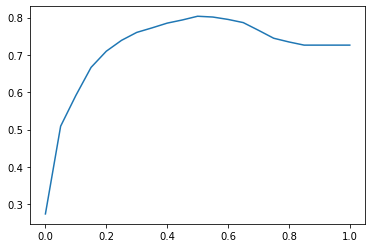

In [63]:
plt.plot(thresholds,scores)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_val,y_pred_val>=0.5), 

(array([[922, 101],
        [176, 210]]),)

In [65]:
210/(210+176+101+922)

0.149041873669269

In [66]:
actual_churn = y_val == 1
actual_notchurn = y_val == 0 

In [67]:
predicted_churn = (y_pred_val>=0.5)
predicted_notchurn = (y_pred_val<0.5)

In [68]:
actual_churn, predicted_churn, actual_churn & predicted_churn

(array([False, False, False, ..., False,  True,  True]),
 array([False, False, False, ..., False,  True,  True]),
 array([False, False, False, ..., False,  True,  True]))

In [69]:
len(y_val)

1409

In [70]:
fp = (predicted_churn & actual_notchurn).sum()
tp = (predicted_churn & actual_churn).sum()

In [71]:
tn = (predicted_notchurn & actual_notchurn).sum()
fn = (predicted_notchurn & actual_churn).sum()

In [72]:
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')

In [74]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [75]:
y_pred_val_rf = rf.predict_proba(x_val)[:,1]

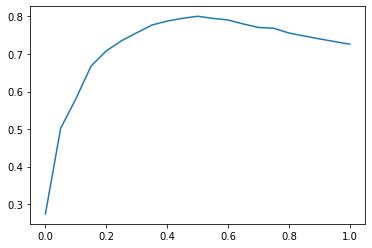

In [76]:
scores = []
thresholds = np.linspace(0,1,21)
for threshold in thresholds:
    score = ((y_pred_val_rf >= threshold) == y_val).mean()
    scores.append(score)
plt.plot(thresholds,scores)

In [77]:
actual_churn = y_val == 1
actual_notchurn = y_val == 0 

predicted_churn = (y_pred_val_rf >= 0.5)
predicted_notchurn = (y_pred_val_rf < 0.5)

In [78]:
fp = (predicted_churn & actual_notchurn).sum()
tp = (predicted_churn & actual_churn).sum()
tn = (predicted_notchurn & actual_notchurn).sum()
fn = (predicted_notchurn & actual_churn).sum()

In [79]:
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

array([[937,  86],
       [195, 191]])

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')

array([[825, 198],
       [199, 187]])

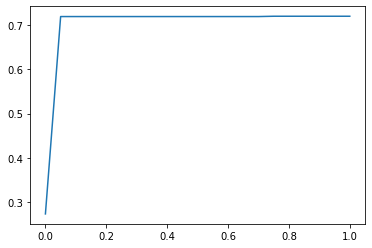

In [81]:
dt.fit(x_train,y_train)

y_pred_val_dt = dt.predict_proba(x_val)[:,1]

scores = []
thresholds = np.linspace(0,1,21)
for threshold in thresholds:
    score = ((y_pred_val_dt >= threshold) == y_val).mean()
    scores.append(score)
plt.plot(thresholds,scores)

actual_churn = y_val == 1
actual_notchurn = y_val == 0 

predicted_churn = (y_pred_val_dt >= 0.5)
predicted_notchurn = (y_pred_val_dt < 0.5)

fp = (predicted_churn & actual_notchurn).sum()
tp = (predicted_churn & actual_churn).sum()
tn = (predicted_notchurn & actual_notchurn).sum()
fn = (predicted_notchurn & actual_churn).sum()
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

In [82]:
from sklearn.svm import SVC
svc = SVC(probability=True,class_weight = 'balanced')

array([[993,  30],
       [324,  62]])

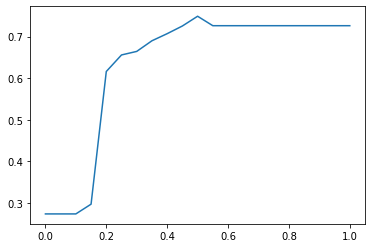

In [83]:
svc.fit(x_train,y_train)
y_pred_val_svc = svc.predict_proba(x_val)[:,1]

scores = []
thresholds = np.linspace(0,1,21)
for threshold in thresholds:
    score = ((y_pred_val_svc >= threshold) == y_val).mean()
    scores.append(score)

plt.plot(thresholds,scores)


actual_churn = y_val == 1
actual_notchurn = y_val == 0 

predicted_churn = (y_pred_val_svc >= 0.5)
predicted_notchurn = (y_pred_val_svc < 0.5)

fp = (predicted_churn & actual_notchurn).sum()
tp = (predicted_churn & actual_churn).sum()
tn = (predicted_notchurn & actual_notchurn).sum()
fn = (predicted_notchurn & actual_churn).sum()

confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

In [84]:
from sklearn.ensemble import BaggingClassifier
bag_svc = BaggingClassifier(estimator= svc)
bag_dt = BaggingClassifier(estimator= dt)
bag_rf = BaggingClassifier(estimator= rf)
bag_lr = BaggingClassifier(estimator= lr)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'))


array([[895, 128],
       [174, 212]])

/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

BaggingClassifier(estimator=LogisticRegression())


/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[922, 101],
       [177, 209]])

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced'))


array([[935,  88],
       [197, 189]])

BaggingClassifier(estimator=SVC(class_weight='balanced', probability=True))


array([[1011,   12],
       [ 338,   48]])

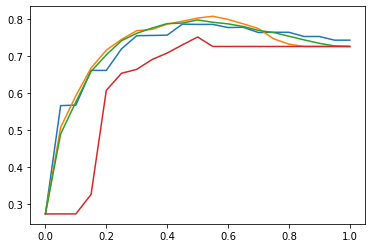

In [85]:
for predictor in [bag_dt, bag_lr, bag_rf, bag_svc]:
    predictor.fit(x_train,y_train)
    y_pred_val_predictor = predictor.predict_proba(x_val)[:,1]

    scores = []
    thresholds = np.linspace(0,1,21)
    for threshold in thresholds:
        score = ((y_pred_val_predictor >= threshold) == y_val).mean()
        scores.append(score)
    print(f'{predictor :}')
    plt.plot(thresholds,scores)
    
    actual_churn = y_val == 1
    actual_notchurn = y_val == 0 

    predicted_churn = (y_pred_val_predictor >= 0.5)
    predicted_notchurn = (y_pred_val_predictor < 0.5)
    
    fp = (predicted_churn & actual_notchurn).sum()
    tp = (predicted_churn & actual_churn).sum()
    tn = (predicted_notchurn & actual_notchurn).sum()
    fn = (predicted_notchurn & actual_churn).sum()
    
    confusion_matrix = np.array([[tn, fp],
                                [fn, tp]])
    display(confusion_matrix)

In [86]:
from sklearn.ensemble import StackingClassifier
# stack = StackingClassifier(estimators= [('svc',svc),('decisionTree', dt),('randomforest', rf), ('logistic_reg',lr)])
stack = StackingClassifier(estimators= [('randomforest', rf), ('logistic_reg',lr)])

/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohamedalgebali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([[933,  90],
       [185, 201]])

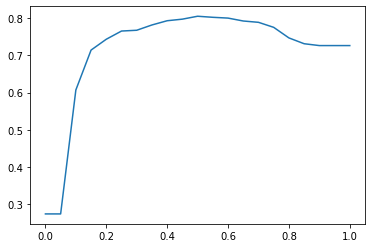

In [87]:
stack.fit(x_train,y_train)
y_pred_val_stack = stack.predict_proba(x_val)[:,1]
scores = []
thresholds = np.linspace(0,1,21)
for threshold in thresholds:
    score = ((y_pred_val_stack >= threshold) == y_val).mean()
    scores.append(score)
plt.plot(thresholds,scores)
actual_churn = y_val == 1
actual_notchurn = y_val == 0 

predicted_churn = (y_pred_val_stack >= 0.5)
predicted_notchurn = (y_pred_val_stack < 0.5)
fp = (predicted_churn & actual_notchurn).sum()
tp = (predicted_churn & actual_churn).sum()
tn = (predicted_notchurn & actual_notchurn).sum()
fn = (predicted_notchurn & actual_churn).sum()
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix

In [88]:
207/(207+96),\
207/(207+179)

(0.6831683168316832, 0.5362694300518135)

##  ROC

In [89]:
tpr = tp / (tp+fn)
fpr = fp / (fp+tn)
fnr = fn / (fn+tp)

In [90]:
scores = []
thresholds = np.linspace(0,1,101)
for threshold in thresholds:
    actual_churn = y_val == 1
    actual_notchurn = y_val == 0 

    predicted_churn = (y_pred_val >= threshold)
    predicted_notchurn = (y_pred_val < threshold)

    fp = (predicted_churn & actual_notchurn).sum()
    tp = (predicted_churn & actual_churn).sum()
    tn = (predicted_notchurn & actual_notchurn).sum()
    fn = (predicted_notchurn & actual_churn).sum()

    tpr = tp / (tp+fn)
    fpr = fp / (fp+tn)
    fnr = fn / (fn+tp)

    scores.append((threshold,tn,fp,fn,tp, tpr,fpr,fnr))

In [91]:
col = ['threshold', 'tn' ,'fp' ,'fn' ,'tp' ,'tpr' ,'fpr' ,'fnr']
socre_df = pd.DataFrame(scores, columns=col)

In [92]:
socre_df

,threshold,tn,fp,fn,tp,tpr,fpr,fnr
0,0.00,0,1023,0,386,1.000000,1.000000,0.000000
1,0.01,110,913,1,385,0.997409,0.892473,0.002591
2,0.02,193,830,2,384,0.994819,0.811339,0.005181
3,0.03,257,766,3,383,0.992228,0.748778,0.007772
4,0.04,308,715,5,381,0.987047,0.698925,0.012953
...,...,...,...,...,...,...,...,...
96,0.96,1023,0,386,0,0.000000,0.000000,1.000000
97,0.97,1023,0,386,0,0.000000,0.000000,1.000000
98,0.98,1023,0,386,0,0.000000,0.000000,1.000000
99,0.99,1023,0,386,0,0.000000,0.000000,1.000000


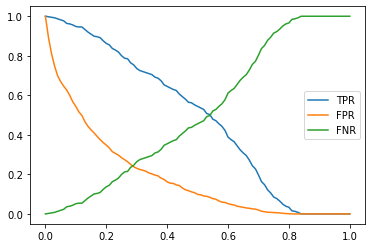

In [93]:
plt.plot(socre_df.threshold, socre_df.tpr, label = 'TPR')
plt.plot(socre_df.threshold, socre_df.fpr, label = 'FPR')
plt.plot(socre_df.threshold, socre_df.fnr, label = 'FNR')
plt.legend()

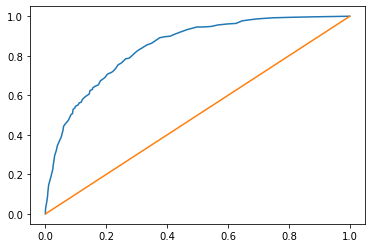

In [95]:
plt.plot(socre_df.fpr, socre_df.tpr, label = 'Model')
plt.plot([0,1],[0,1], label = 'Random')


In [97]:
from sklearn.metrics import auc , roc_auc_score, roc_curve
auc(socre_df.fpr,socre_df.tpr)

0.8438732975754537

In [98]:
roc_auc_score(y_val, y_pred_val)

0.843850505725819

In [100]:
fpr,tpr,thresh = roc_curve(y_val, y_pred_val)
auc(fpr,tpr)


0.843850505725819

In [ ]:
def train(df_train, y):
    model = LogisticRegression()
    x_tr = df_train[categorical+numerical].to_dict('records')

    dv = DictVectorizer(sparse=False)
    x_tr = dv.fit_transform(x_tr)

    model.fit(x_tr, y)

    return model, dv

In [7]:
customer = {
        "gender": "female",
        "seniorcitizen": 0,
        "partner": "yes",
        "dependents": "no",
        "phoneservice": "no",
        "multiplelines": "no_phone_service",
        "internetservice": "dsl",
        "onlinesecurity": "no",
        "onlinebackup": "yes",
        "deviceprotection": "no",
        "techsupport": "no",
        "streamingtv": "no",
        "streamingmovies": "no",
        "contract": "month-to-month",
        "paperlessbilling": "yes",
        "paymentmethod": "electronic_check",
        "tenure": 100,
        "monthlycharges": 29.85,
        "totalcharges": 29.85
    }

In [8]:
import requests
print(requests.post('http://0.0.0.0:9658/predict', json = customer))
requests.post('http://0.0.0.0:9658/predict', json = customer).json()

<Response [200]>


{'prediction': False, 'probability': 0.003948087906534957}